### Project 1: Implement Matrix Multiplication Manually 

In [37]:
# Manual matrix multiplication 
import numpy as np

A = [[5,3,5],
    [1,0,0],
    [2,0,9]]

B =[[0,13,1],
    [1,0,-1],
    [-2,0,0] ]
C = [[0 for _ in range(3)] for _ in range(3)]

for i in range(3):
    for j in range(3):
        for k in range(3):
            C[i][j] += A[i][k]*B[k][j]
            
# Display result
for row in C:
    print(row)
            
C

[-7, 65, 2]
[0, 13, 1]
[-18, 26, 2]


[[-7, 65, 2], [0, 13, 1], [-18, 26, 2]]

In [35]:
A = np.array([[5,3,5],
    [1,0,0],
    [2,0,9]])

B =np.array([[0,13,1],
    [1,0,-1],
    [-2,0,0] ])
np.dot(A,B)

array([[ -7,  65,   2],
       [  0,  13,   1],
       [-18,  26,   2]])

In [36]:
A@B

array([[ -7,  65,   2],
       [  0,  13,   1],
       [-18,  26,   2]])

### Project 2: Linear Transformation Visualizer (2D)

This shows how a weight matrix changes direction and magnitude of points in space.

In [66]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = 200
points = np.random.randn(N,2)
# Each row is a point:
# [x, y]

#### 3. Define a linear transformation matrix

You can change this matrix to see different effects.

In [69]:
W = np.array([[1.5,0.8],
             [0.2,1.0]])

#### This matrix:
* scales
* rotates slightly
* mixes features (like a neural network layer)

#### 4. Apply the transformation

In [70]:
transformed_points = points@W.T

#### Why transpose?
* Each point is a row vector
* Matrix multiplication must align dimensions

#### 5. Plot before vs after

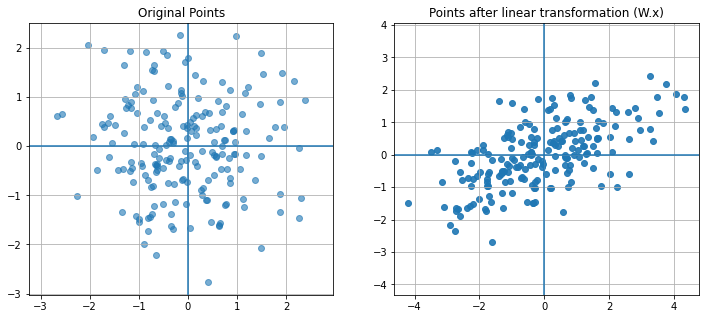

In [77]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(points[:,0],points[:,1],alpha=0.6)
plt.axhline(0)
plt.axvline(0)
plt.grid()
plt.title("Original Points")
plt.axis("Equal")

# after transformation
plt.subplot(1,2,2)
plt.scatter(transformed_points[:,0],transformed_points[:,1],alpha=0.9)
plt.axhline(0)
plt.axvline(0)
plt.grid()
plt.title("Points after linear transformation (W.x)")
plt.axis("Equal")

plt.show()

### 6. What you should observe
* Shape of the point cloud changes
* Distances stretch or compress
* Axes tilt or skew
* This is exactly what a linear layer does in ML

### 7. ML intuition connection
* Each layer does: x → W·x
* Training adjusts W
* Space is reshaped to make problems easier
* PCA, linear regression, and neural networks all rely on this

#### Practice experiments (important)
* Try these matrices one by one:
* Pure scaling

In [79]:
W = np.array([[2, 0],
              [0, 0.5]])

### Rotation

In [80]:
theta = np.pi / 4
W = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])


### Reflection

In [81]:
W = np.array([[-1, 0],
              [0, 1]])

### Shear

In [82]:
W = np.array([[1, 1],
              [0, 1]])

#### Why this project matters
* Builds geometric intuition
* Makes matrix multiplication tangible
* Directly maps to ML weight matrices
* Essential for understanding PCA, embeddings, and deep networks

### Project 4: Compute Eigenvalues and Use Them for PCA 

#### 1. Generate 2D data (correlated features)

In [39]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(0)

# generate correlated data
x = np.random.randn(200)
y = 2*x + np.random.randn(200)*0.5

X = np.column_stack((x,y))
X

array([[ 1.76405235,  3.34351377],
       [ 0.40015721,  0.68062483],
       [ 0.97873798,  2.50730577],
       [ 2.2408932 ,  4.80941826],
       [ 1.86755799,  4.05518174],
       [-0.97727788, -2.76303378],
       [ 0.95008842,  1.88801377],
       [-0.15135721, -0.67172987],
       [-0.10321885, -0.0664754 ],
       [ 0.4105985 ,  0.77212181],
       [ 0.14404357,  0.7431766 ],
       [ 1.45427351,  3.06715612],
       [ 0.76103773,  1.91523943],
       [ 0.12167502,  0.01014048],
       [ 0.44386323,  0.41550334],
       [ 0.33367433,  0.46232381],
       [ 1.49407907,  2.97964794],
       [-0.20515826, -0.22074066],
       [ 0.3130677 ,  1.75578988],
       [-0.85409574, -1.72932005],
       [-2.55298982, -5.58395213],
       [ 0.6536186 ,  1.1342463 ],
       [ 0.8644362 ,  1.49707441],
       [-0.74216502, -1.2435893 ],
       [ 2.26975462,  3.76911074],
       [-1.45436567, -2.87710035],
       [ 0.04575852,  0.1697703 ],
       [-0.18718385, -0.25827718],
       [ 1.53277921,

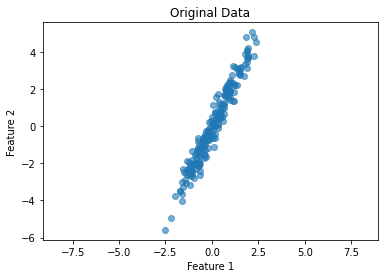

In [40]:
# Visualize the raw data:

plt.scatter(X[:,0],X[:,1],alpha = 0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data")
plt.axis("Equal")
plt.show()

### 2. Center the data (critical for PCA)

In [44]:
X_meaned = X - np.mean(X,axis = 0)

#### Why
* PCA looks at variance around the mean
* Without centering, results are wrong

### 3. Create the covariance matrix

In [45]:
cov_matrix = np.cov(X_meaned.T)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[1.04854721 2.13370199]
 [2.13370199 4.56417088]]


#### Interpretation
* Diagonal → variance of each feature
* Off-diagonal → how features vary together

### 4. Compute eigenvalues and eigenvectors

In [47]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n",eigenvalues)
print("Eigenvectors:\n",eigenvectors)

Eigenvalues:
 [0.04183619 5.57088191]
Eigenvectors:
 [[-0.90439106 -0.4267046 ]
 [ 0.4267046  -0.90439106]]


#### Meaning
* Eigenvalues → amount of variance
* Eigenvectors → directions of variance

### 5. Sort eigenvalues (most important first)

In [60]:
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

print("Sorted Eigenvalues:\n", eigenvalues)


Sorted Eigenvalues:
 [5.57088191 0.04183619]


### 6. Identify the principal direction (PC1)

In [61]:
principal_direction = eigenvectors[:,0]
print("Principal Direction (PC1):", principal_direction)

Principal Direction (PC1): [-0.4267046  -0.90439106]


#### This vector:
* Points in the direction of maximum variance
* Defines the first principal component

### 7. Visualize the principal component

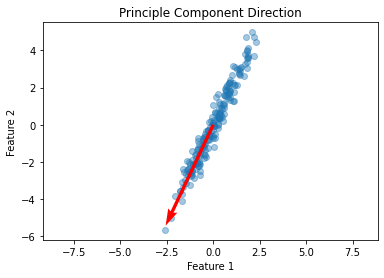

In [64]:
plt.scatter(X_meaned[:,0],X_meaned[:,1], alpha = 0.4)

origin = np.zeros(2)
plt.quiver(
    origin[0],origin[1],
    principal_direction[0], principal_direction[1],
    scale = 3, color = "red", width = 0.01
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Principle Component Direction")
plt.axis("equal")
plt.show()

#### What you should see
* Red arrow aligns with data elongation
* This is PCA capturing maximum variance

### 8. Project data onto the principal component

In [65]:
X_pca_1d = X_meaned @ principal_direction
print("Projected dat shape:",X_pca_1d.shape)

Projected dat shape: (200,)


#### This step:
* Reduces 2D → 1D
* Keeps maximum information

### 9. ML intuition takeaway
* Covariance matrix captures relationships
* Eigenvectors give meaningful directions
* Eigenvalues tell importance
* PCA is just linear algebra + geometry
* Libraries automate this, but this is the core logic

### Practice extensions
* 1. Keep top-2 components and reconstruct data
* 2. Compare with sklearn.decomposition.PCA
* 3. Try uncorrelated data and observe eigenvalues
* 4. Apply PCA before linear regression